In [1]:
import numpy as np
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 298 * unit.kelvin / unit.kilocalories_per_mole

In [3]:
title_pairs = [["N501Y", "Y501N"], ["K417N", "N417K"], ["E484K", "K484E"], ["N501Y->N501Y/K417N", "N501Y->N501Y/K417N"], ["N501Y->N501Y/E484K", "N501Y->N501Y/E484K"], ["K417N->N501Y/K417N", "N501Y/K417N->K417N"], ['K417N->K417N/E484K', 'K417N/E484K->K417N'], ["E484K->N501Y/E484K", "N501Y/E484K->E484K"], ["E484K->K417N/E484K", "K417N/E484K->E484K"]]
dir_num = 31
subdirs = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
to_plot = np.zeros(shape=(len(np.array(title_pairs).flatten()), 3))
for i, subdir in enumerate(subdirs):
    with open(f"/data/chodera/zhangi/perses_benchmark/repex/{dir_num}/{subdir}/0/results.npy", "rb") as f:
        results = np.load(f, allow_pickle=True)
        complex_dg, complex_ddg, apo_dg, apo_ddg = [result[-1]*KT_KCALMOL for result in results]
        binding_dg = complex_dg - apo_dg
        binding_ddg = (apo_ddg**2 + complex_ddg**2)**0.5
        if i % 2 == 0:
            to_plot[i] = np.array([binding_dg, 2*binding_ddg , 2*binding_ddg])
        else:
            to_plot[i] = np.array([binding_dg*-1, 2*binding_ddg, 2*binding_ddg])
            
            

In [4]:
to_plot

array([[ 7.2448847 ,  1.16556861,  1.16556861],
       [ 1.21589006,  1.26104197,  1.26104197],
       [ 2.22536105,  1.54962392,  1.54962392],
       [ 3.99143286,  1.28382907,  1.28382907],
       [ 2.11876723,  1.95875958,  1.95875958],
       [-0.10807062,  2.17172748,  2.17172748],
       [ 4.7052187 ,  1.37119488,  1.37119488],
       [ 3.7726585 ,  0.95766584,  0.95766584],
       [ 0.27169227,  1.56828341,  1.56828341],
       [ 1.09783021,  2.08520812,  2.08520812],
       [ 5.63773621,  1.07627432,  1.07627432],
       [ 0.7296971 ,  1.69702291,  1.69702291],
       [ 1.63655091,  1.66047777,  1.66047777],
       [-1.3964114 ,  2.5646156 ,  2.5646156 ],
       [ 4.26165647,  1.40907871,  1.40907871],
       [-0.95116495,  1.47906984,  1.47906984],
       [-0.44880732,  1.5033392 ,  1.5033392 ],
       [ 1.72485234,  1.45249395,  1.45249395]])

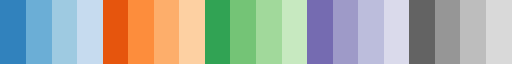

In [24]:
cmap

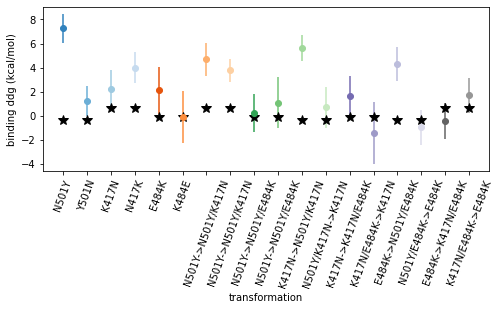

In [37]:
plt.figure(figsize=(8, 6))
plt.gcf().subplots_adjust(bottom=0.5)

cmap = plt.get_cmap('tab20c')
colors = [cmap(i) for i in range(len(to_plot))]

# Plot the perses predictions with error bars
for i, plot_value in enumerate(to_plot):
    plt.errorbar(i, plot_value[0], yerr=[[plot_value[1]], [plot_value[2]]], ls='none', marker='o', color=colors[i], ecolor=colors[i])

# Plot the experimental values
exp = [-0.33, -0.33, 0.62, 0.62, -0.08, -0.08, 0.62, 0.62, -0.08, -0.08, -0.33, -0.33, -0.08, -0.08, -0.33, -0.33, 0.62, 0.62]
plt.plot(list(range(to_plot.shape[0])), exp, ls='none', marker='*',  markersize=10, color='black')

# Format the plot
plt.ylabel("binding ddg (kcal/mol)")
plt.xlabel("transformation")
plt.xticks(range(to_plot.shape[0]), np.array(title_pairs).flatten(), rotation=70)
plt.savefig(f"/data/chodera/zhangi/perses_benchmark/repex/{dir_num}/ddg_vs_transform_with_cis.png", dpi=400)